# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Recap: t-tests

In [1]:
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Remove null values as these will throw off the ttest
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [4]:
# salary values
df['salary'].value_counts()
df['salary'].value_counts().index[0]

' <=50K'

In [5]:
## what is the average age?
popmean=df['age'].mean()
print(popmean)

38.58164675532078


In [6]:
# restrict to high earners
hibucks = df[df['salary']==' >50K']

hibucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [7]:
# is age continuous?
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [8]:
# is the average age of high earners above the population average? yes.
ttest_1samp(hibucks['age'], popmean, nan_policy='omit')

Ttest_1sampResult(statistic=47.71498812387393, pvalue=0.0)

In [9]:
# is there a sig difference between the age of high and low earners? yes.
lobucks = df[df['salary']==' <=50K']
ttest_ind(hibucks['age'], lobucks['age'], nan_policy='omit')

Ttest_indResult(statistic=43.436244240451096, pvalue=0.0)

In [10]:
# subset male and female low earners
lobucks_male = df[(df['salary']==' <=50K') & (df['sex']==' Male')]
lobucks_female = df[(df['salary']==' <=50K') & (df['sex']==' Female')]
df['sex'].value_counts().index[0] # note the trailing space.

' Male'

In [11]:
# is there a sig difference between the male and female low earners? yes.
ttest_ind(lobucks_female['age'], lobucks_male['age'], nan_policy='omit')

Ttest_indResult(statistic=-5.118769813761817, pvalue=3.098380651743999e-07)

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [12]:
# consider a crosstab. Are men and women equally distributed by salary?
gap=pd.crosstab(df['sex'], df['salary'])
gap

salary,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [13]:
# can we test that?
from scipy.stats import chisquare  # One-way chi square test
chisquare(gap, axis=None)

Power_divergenceResult(statistic=12478.787844353674, pvalue=0.0)

In [14]:
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)


In [15]:
dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


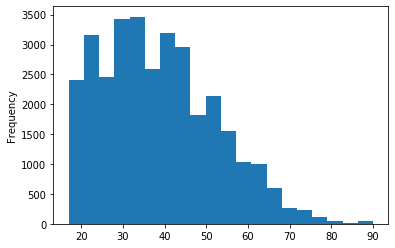

In [16]:
# Is a distribution normal? This is a poisson distribution
df['age'].plot(kind='hist', bins=20);

In [17]:
# Is it normal?
from scipy.stats import normaltest
normaltest(df['age'])

NormaltestResult(statistic=1526.0108462557214, pvalue=0.0)

In [18]:
sample = np.random.normal(5, 25, 1000) # mean, std dev, number of obs
print(normaltest(sample))  # Pretty clearly  normal

NormaltestResult(statistic=0.5554833982467654, pvalue=0.7574924572125407)


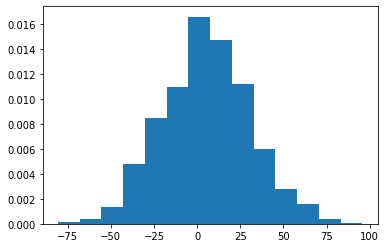

In [19]:
# display that!
count, bins, ignored = plt.hist(sample, 14, density=True)
plt.show()

In [20]:
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=30.357489379997855, pvalue=2.5583204295271426e-07)


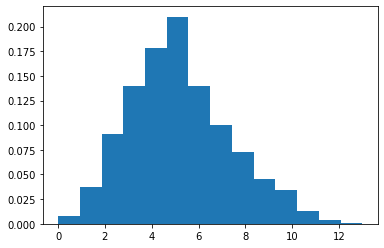

In [21]:
# display that!
count, bins, ignored = plt.hist(sample, 14, density=True)
plt.show()

And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Central Limit Theorem



In [22]:
# Flip a coin.
np.random.binomial(n=1, p=.5)

1

In [23]:
# Let me flip a coin twelve times.
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

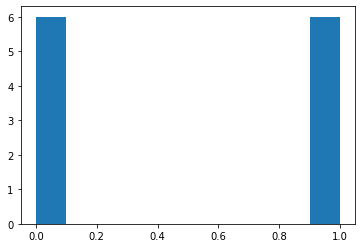

In [24]:
# show that.
plt.hist(coinflips);

In [25]:
# what is the mean of this sample of coinflips?
coinflips.mean()

0.5

In [26]:
# what if I do it again?
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [27]:
# and the mean?
coinflips.mean()

0.5

In [28]:
# why are these means different? shouldn't it be the same at .5 for a fair coin?
coinflips = np.random.binomial(n=1, p=.5, size=1000)
coinflips.mean()

0.475

**each of these 'samples' is an estimate of the distribution.** . 
https://www.youtube.com/watch?v=Kq7e6cj2nDw

In [29]:
# take 3000 samples of size 12, and make a list of their means.

sample_means = []
for x in range(0,3000):
    coinflips = np.random.binomial(n=1, p=.5, size=12)
    one_sample = coinflips
    sample_means.append(coinflips.mean())

print(len(sample_means))

3000


In [30]:
# look at the first 10 means.
print(sample_means[:10])

[0.5, 0.9166666666666666, 0.4166666666666667, 0.6666666666666666, 0.4166666666666667, 0.5833333333333334, 0.6666666666666666, 0.3333333333333333, 0.5833333333333334, 0.3333333333333333]


In [31]:
# make a df of one sample
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,0
2,0
3,0
4,1


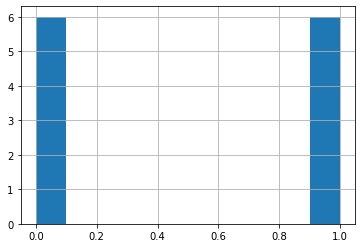

In [32]:
# this df is clearly a binomial distribution (one and zero are the only options)
df.single_sample.hist();

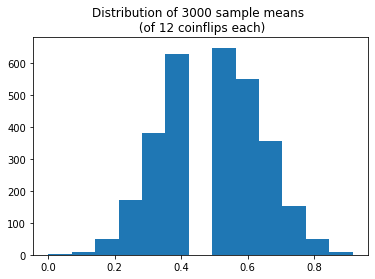

In [33]:
# now plot all 3000 sample means
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

In [34]:
# is this a normal distribution?
normaltest(sample_means)

NormaltestResult(statistic=8.335166447951195, pvalue=0.015489649938905139)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [35]:
# let's pretend each sample included 100 coin flips, not just 12.
sample_means = []
for x in range(0,3000):
    coinflips = np.random.binomial(n=1, p=.5, size=100)
    one_sample = coinflips
    sample_means.append(coinflips.mean())
# the higher my sample size, the closer I get to .5!
print(len(sample_means))
print(sample_means[:10])

3000
[0.49, 0.48, 0.38, 0.6, 0.5, 0.55, 0.56, 0.46, 0.54, 0.51]


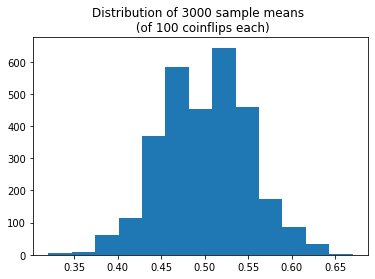

In [36]:
# when I plot, it gets a little taller and a little narrower!
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 100 coinflips each)');

This outcome is what we call the Central Limit Theorem. No matter the distribution of my underlying data, the distribution of the estimates will be distributed normally.

In [37]:
# Compare sets of small and large samples
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
    coinflips_small = np.random.binomial(n=1, p=.5, size=20)
    coinflips_large = np.random.binomial(n=1, p=.5, size=100)
    one_small_sample = coinflips_small
    one_small_large = coinflips_large
    sample_means_small.append(coinflips_small.mean())
    sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small[:10])

3000
[0.5, 0.5, 0.6, 0.45, 0.3, 0.65, 0.65, 0.35, 0.45, 0.6]


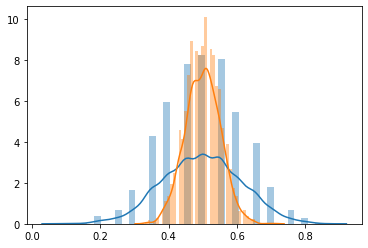

In [38]:
# Plot that for comparison: it gets taller, narrower, and more normal.
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
    sns.distplot(sample)

## Confidence Interval

![source](https://www.mathsisfun.com/data/images/ci95.gif)

With 95% confidence, the population mean is within these bounds. This is the [margin of error](https://www.monmouth.edu/polling-institute/reports/monmouthpoll_ia_111219/) we often seen in political polls.

Between the upper and lower bounds we can find 95% of the sample means.

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

s = standard deviation of the sample  
n = sample size  
t = test statistic  
X = sample mean
  
As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [39]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [40]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # just looking up the corresponding t-stat.
    return (mean, mean - moe, mean + moe)

In [41]:
# what's the conf interval for a sample of 500 coin flips?
coinflips = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(coinflips) # mean, upper bound, lower bound.

(0.492, 0.44802894592557513, 0.5359710540744249)

In [42]:
# try this again. It should capture the mean 95% of the time.
coinflips = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(coinflips)

(0.508, 0.46402894592557514, 0.5519710540744249)

We want the t-statistic that corresponds to the probability cut off for a given t distribution  (a distribution with a certain 'degrees of freedom').  
`stats.t.ppf` is just looking up the corresponding t-statistic.

**Degrees of freedom**  
degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

**Looking at stats.t.ppf**

In [43]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025

confidence_level = .95
dof = 42-1

stats.t.ppf((1 + confidence_level) / 2, dof)

2.0195409639828936

## Graphically Represent a Confidence Interval

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

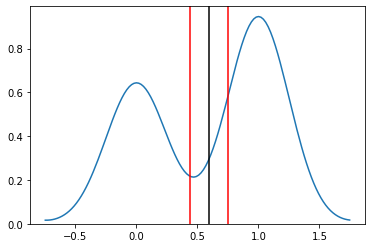

In [45]:
# fake data - one samle of 42 coin flips
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
# kernel density estimate
sns.kdeplot(coinflips_42)
CI = confidence_interval(coinflips_42)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

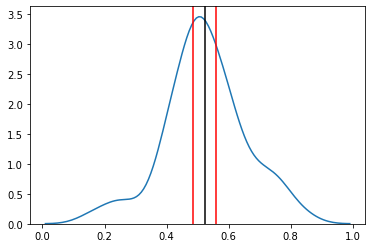

In [46]:
# fake data - 50 samples of 12 coin flips
sample_means = []
for x in range(0,50):
    coinflips = np.random.binomial(n=1, p=.5, size=12)
    one_sample = coinflips
    sample_means.append(coinflips.mean())
# kernel density estimate
sns.kdeplot(sample_means)
CI = confidence_interval(sample_means)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [93]:
# now with a real dataset.
import pandas as pd
import scipy.stats as stats
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [90]:
# what's the average age of hi earners in our sample?
hibucks = df[df['salary']==' >50K']
hibucks['age'].mean()

44.24984058155847

In [92]:
# calculate a 95% confidence interval on either side of this.

conf_int=stats.t.interval(0.95, # alpha (ie, confidence level)
                 hibucks.shape[0], # length of sample
                 loc = hibucks['age'].mean(), # mean
                 scale = stats.sem(hibucks['age']) # std error of the mean
                 )
conf_int

(44.01697515815307, 44.48270600496387)

In [102]:
# same thing but using formula for std error of the mean
conf_int=stats.t.interval(0.95,
                 hibucks.shape[0],
                 loc = hibucks['age'].mean(),
                 scale = (np.std(hibucks['age'], ddof = 1))/hibucks.shape[0] ** 0.5
                 )
conf_int

(44.01697515815307, 44.48270600496387)

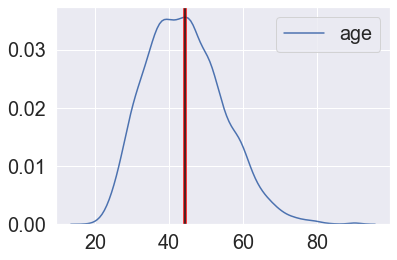

In [104]:
# plot on graph with kernel density estimate
sns.kdeplot(hibucks['age'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=hibucks['age'].mean(), color='k');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [47]:
from scipy.stats import t, ttest_1samp

**Note that scipy has a built-in function to calculate the confidence interval**   
t.interval

In [48]:
import numpy as np

coinflip_means = []
for x in range(0,100):
    coinflips = np.random.binomial(n=1, p=.5, size=30)
    coinflip_means.append(coinflips.mean())

print(coinflip_means[:10])

[0.4666666666666667, 0.43333333333333335, 0.4, 0.5333333333333333, 0.4666666666666667, 0.6666666666666666, 0.3, 0.5666666666666667, 0.5, 0.4666666666666667]


**Rebuild the earlier function**
but using `t.interval` instead.

In [49]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4838507346160671, 0.5228159320505993)


In [50]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)
CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4838507346160671, 0.5228159320505993)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [51]:
# pick a value for my null hypothesis and check the p-value
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.357941330314892, pvalue=0.1775692196776086)

In [52]:
# what if I pick a null hypothesis that's just outside of our confidence interval? 
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=2.183634161359543, pvalue=0.03135136592292841)

In [53]:
# I would only see this 5% of the time, so it's unlikely and I reject the null hypothesis.
# A comparison of what we EXPECT and what we OBSERVE.

## Chi Squared Test $\chi^{2}$

A test for dependence of categorical variables. (ie, are they correlated?)

In [54]:
# read back in the earlier data.
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
# just the numeric columns
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      

In [56]:
# just the non-numeric columns (ie, categorical)
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [57]:
# create some binned categories 
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [58]:
# sex
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [59]:
# binned category
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [60]:
df = df.sort_values(by='hours_per_week_categories', ascending=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
31290,55,Self-emp-not-inc,41938,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,<=50K,0-9
5172,32,NaN,134886,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,0,2,United-States,>50K,0-9
22928,17,NaN,332666,10th,6,Never-married,NaN,Own-child,White,Female,0,0,4,United-States,<=50K,0-9
7902,35,Private,359131,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7298,0,8,NaN,>50K,0-9
6604,41,Private,406603,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,6,Iran,<=50K,0-9


In [61]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [62]:
# create a set of female counts
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [63]:
# create a set of male counts
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

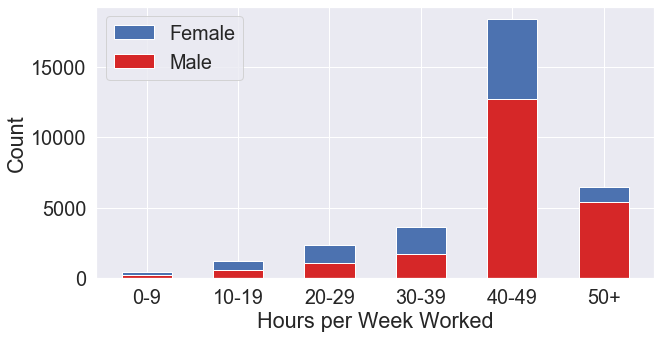

In [64]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [65]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [66]:
total = contingency_table.loc['All','All']
total

32561

In [67]:
df.shape[0]

32561

In [68]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [69]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [70]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 2287.190943926107


In [71]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)


# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")   

Degrees of Freedom: 5


## Run a $\chi^{2}$ Test using Scipy

In [72]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex.

### Another example

In [73]:
# sex and salary
observed=pd.crosstab(df['sex'], df['salary']).values

In [74]:
# chi square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1517.813409134445
P-value: 0.0
Degrees of Freedom: 1
Expected: 
 [[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [75]:
# age and salary
df['age_groups']=0
df.loc[df['age']>20, 'age_groups']=1
df.loc[df['age']>30, 'age_groups']=2
df.loc[df['age']>40, 'age_groups']=3
df.loc[df['age']>50, 'age_groups']=4
df['age_groups'].value_counts()

2    8546
1    8162
3    6983
4    6460
0    2410
Name: age_groups, dtype: int64

In [76]:
# crosstab
observed=pd.crosstab(df['age_groups'], df['salary']).values
observed

array([[2408,    2],
       [7482,  680],
       [6140, 2406],
       [4328, 2655],
       [4362, 2098]])

In [77]:
# chi square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2935.441819762824
P-value: 0.0
Degrees of Freedom: 4
Expected: 
 [[1829.64896656  580.35103344]
 [6196.51239213 1965.48760787]
 [6488.04152207 2057.95847793]
 [5301.42686035 1681.57313965]
 [4904.3702589  1555.6297411 ]]
